# Pandas

В этом задании предлагается провести небольшой анализ данных датасета [studens](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

In [1]:
import pandas as pd
%matplotlib inline

## Задание 1 ★☆☆

Считайте файл в переменную `data` определите размер таблицы.

In [7]:
data = pd.read_csv("student-mat.csv", sep=";")

In [8]:
# размер это tuple (количество строк, количество столбцов)
shape = data.shape

Значение для формы

In [9]:
print(' '.join(map(str, shape)))

395 33


Посмотрите первые пять строк

In [10]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Выведите список названий столбцов

In [11]:
data.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

## Задание 2 ★☆☆

Определите количество студентов, у которых оценка G1 выше среднего.

In [22]:
#data[data["G1"] > data["G1"].mean()].shape

In [20]:
more_then_mean = sum(data["G1"] > data["G1"].mean())

Значение для формы

In [21]:
print(more_then_mean)

202


## Задание 3 ★☆☆

Определите значение для поля `absences` после сортировки по убыванию по полю `G3`, которое находится на 100 позиции после сортировки (отсчет с 0).

In [36]:
absences_at_100 = data.sort_values("G3", ascending=False)["absences"].values[100]

Значение для формы

In [37]:
print(absences_at_100)

6


## Задание 4 ★☆☆

Определите долю студентов женского и мужского пола. 

In [45]:
# получите объект series индексы которого: F и M
serires_object = data.sex.value_counts()

Значение для формы

In [46]:
print("{:.3f} {:.3f}".format(serires_object['M'], serires_object['F']))

187.000 208.000


## Задание 5 ★★☆

Определите общее количество пропущенных значений в таблице.

In [52]:
null_count = data.isnull().sum().sum()

Значение для формы

In [53]:
print(null_count)

0


## Задание 6 ★★☆

Определите уникальные значения 'Mjob', отсортируйте их по алфавиту, сопоставьте каждому значению его позицию в отсорированном списке и замените значения в таблице на его позицию. Например, если вы получили список уникальных значений ['a', 'c', 'f'], то вместо 'a' везде нужно поставить 0, вместо 'c' везде нужно поставить 1, а вместо 'f' - 
2.

In [70]:
data['Mjob'] = data['Mjob'].map(dict(zip(sorted(data['Mjob'].unique()), list(range(len(data['Mjob'].unique()))))))

Значение для формы

In [72]:
print(data['Mjob'].value_counts().idxmax())

2


## Задание 7 ★★☆

Сгруппируйте данные по полю 'sex' и определите среднее значение, медиану и максимальное значение оценок 'G3'.
Подсказка: agg

In [81]:
# получите data frame с соответсвующими стрками (по полю sex) и столбцами (среднее, медиана и максимум)
df_grouped = data.groupby(["sex"])["G3"].agg(['mean', 'median', 'max'])

Значение для формы

In [82]:
print("{:.3f}".format(df_grouped.sum().sum()))

80.881


## Задание 8 ★★☆

Определите среднее количество пропусков занятий ('absences') среди студентов, каждая оценка которых ('G1', 'G2', 'G3') выше медианы.

In [87]:
mean_score_high_level = data[(data["G1"] > data["G1"].median()) & (data["G2"] > data["G2"].median()) & (data["G3"] > data["G3"].median())].absences.mean()

Значение для формы

In [88]:
print("{:.4f}".format(mean_score_high_level))

4.4926


## Визуализация в pandas

Постройти распределение оценок 'G1'(гистограмму). Используйте методы для data frame и series.

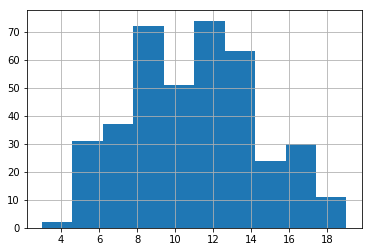

In [89]:
data["G1"].hist()

Постройте scatter plot по признакам 'G3'и 'absences'

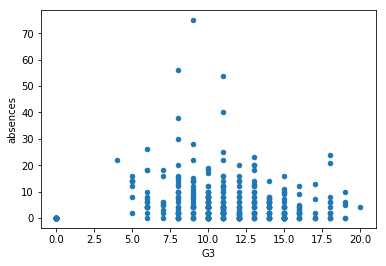

In [90]:
data.plot.scatter("G3", "absences")